In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [10]:
def load_data():
    base_path="/kaggle/input/cifar10-hw3/cifar_hw3/"
    x_test = np.load(base_path + "x_test.npy")
    x_train = np.load(base_path + "x_train.npy")
    x_val = np.load(base_path + "x_val.npy")
    
    y_test = np.load(base_path + "y_test.npy")
    y_train = np.load(base_path + "y_train.npy")
    y_val = np.load(base_path + "y_val.npy")
    
    print("Train shape:", x_train.shape, y_train.shape)
    print("Test shape:", x_test.shape, y_test.shape)
    print("Val shape:", x_val.shape, y_val.shape)

    return x_train, y_train, x_test, y_test, x_val, y_val

In [11]:
x_test, x_train, x_val, y_test, y_train, y_val = load_data()

Train shape: (40000, 32, 32, 3) (40000, 1)
Test shape: (10000, 32, 32, 3) (10000, 1)
Val shape: (10000, 32, 32, 3) (10000, 1)


In [12]:
def show_images(images, title="Immagini", num=5):
    plt.figure(figsize=(12, 3))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i].astype(np.uint8))
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

In [13]:
def remove_colored_block(images, block_size=5):
    images_cleaned = images.copy()
    
    for img in images_cleaned:
        h = img.shape[0]
        w = img.shape[1]
        found = False
        
        for i in range(h - block_size + 1):
            for j in range(w - block_size + 1):
                #estraggo il blocco corrente
                block = img[i:i+block_size, j:j+block_size] 
                if np.all(block == block[0, 0]):
                    #imposto il blocco in bianco
                    img[i:i+block_size, j:j+block_size] = 255  
                    found = True
                    break
            if found:
                break
                
    return images_cleaned



In [14]:

def preprocess(x_train, x_val, x_test):
    #flatten e normalizzazione
    x_train = x_train.reshape(len(x_train), -1).astype("float32") / 255.0
    x_val = x_val.reshape(len(x_val), -1).astype("float32") / 255.0
    x_test = x_test.reshape(len(x_test), -1).astype("float32") / 255.0

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_val = scaler.transform(x_val)
    x_test = scaler.transform(x_test)
    return x_train, x_val, x_test


In [15]:
def grid_search(x_train, y_train):
    
    param_grid = {
        'hidden_layer_sizes': [(64,), (128,), (64, 32)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.005]
    }

    mlp = MLPClassifier(max_iter=200, early_stopping=True, validation_fraction=0.1, random_state=42)
    grid = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

    grid.fit(x_train, y_train.ravel())
    print("Migliori parametri trovati: ")
    print(grid.best_params_)
    return grid.best_estimator_


In [16]:
import seaborn as sns

def plot_confusion_matrix(cm, title): 
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
    plt.title(title) 
    plt.xlabel("Predetto") 
    plt.ylabel("Reale") 
    plt.show()

In [17]:
def evaluate_model(model, x, y, name):
    pred = model.predict(x)
    print(f"\n{name} Accuracy: {accuracy_score(y, pred):.4f}")
    print(f"\n{name} Confusion Matrix:\n{confusion_matrix(y, pred)}")
    plot_confusion_matrix(confusion_matrix(y,pred), "Matrice di confusione")



Train shape: (40000, 32, 32, 3) (40000, 1)
Test shape: (10000, 32, 32, 3) (10000, 1)
Val shape: (10000, 32, 32, 3) (10000, 1)


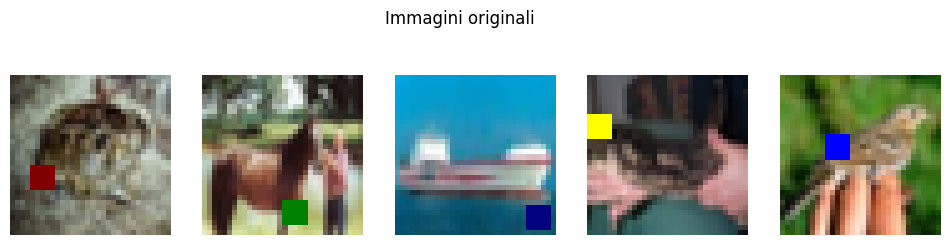

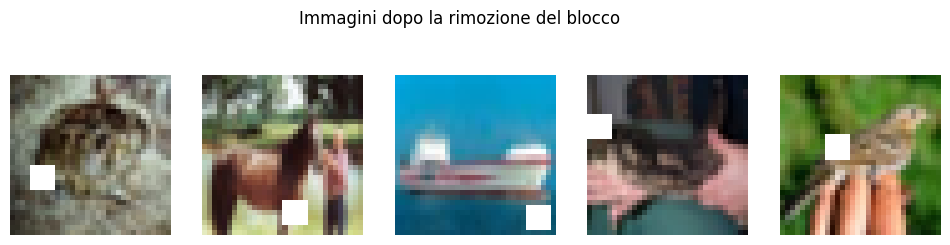

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Migliori parametri trovati: 
{'alpha': 0.0001, 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001}

Train Accuracy: 0.6020

Train Confusion Matrix:
[[2321  178  108  232  123   78   55  141  474  290]
 [  78 2999   19   63   60   40   64   50  193  434]
 [ 208  125 1335  469  729  401  282  241  109  101]
 [  56  100  120 1878  236  912  267  190  103  138]
 [ 162   83  191  271 2293  277  193  318  120   92]
 [  42   83  127  592  246 2362  188  204   77   79]
 [  30  115   74  332  433  398 2384  118   45   71]
 [  94   73   53  207  336  269   64 2699   66  139]
 [ 239  178   33  104   62   58   24   30 2992  280]
 [  73  496   28  100   61   60   65  130  171 2816]]


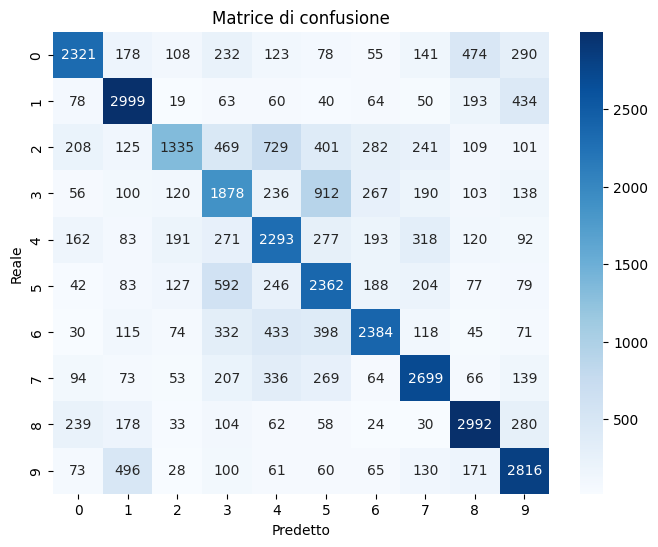


Validation Accuracy: 0.4828

Validation Confusion Matrix:
[[501  56  41  61  23  14  22  47 141  94]
 [ 32 606  14  23  23  17  26  26  85 148]
 [ 76  31 211 141 196 116 103  71  32  23]
 [ 21  33  24 315  99 246 129  47  39  47]
 [ 40  29  58  85 489  61  97  91  32  18]
 [ 22  20  36 192  89 432  68  73  28  40]
 [  1  31  26  99 135  91 552  29  16  20]
 [ 29  30  30  73 125  86  21 536  15  55]
 [ 85  73  11  35  18  18   6  12 660  82]
 [ 21 218   7  32  22  25  36  45  68 526]]


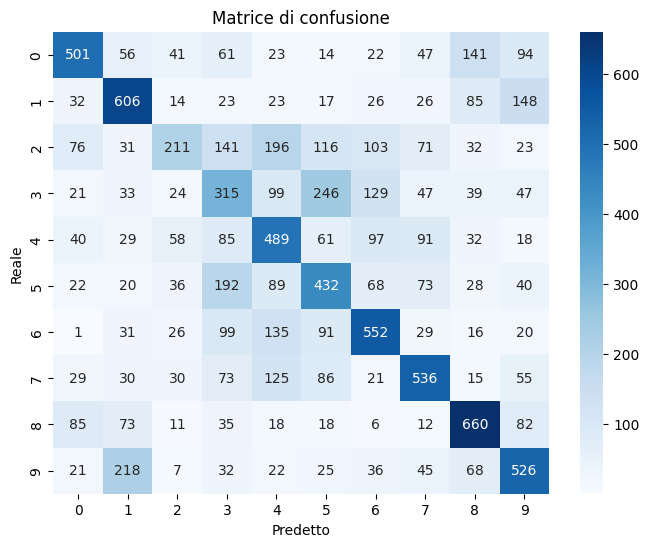


Test Accuracy: 0.4810

Test Confusion Matrix:
[[491  80  43  52  43  21  23  35 121  91]
 [ 32 612   7  25  24  18  23  21  74 164]
 [ 61  37 206 154 224  93  95  75  30  25]
 [ 17  37  38 307  83 278 110  52  28  50]
 [ 40  30  52  76 488  67  92 106  23  26]
 [ 15  22  54 181  89 437  72  59  33  38]
 [  6  27  24 103 150  92 540  29  12  17]
 [ 23  27  27  69 126  75  40 537  27  49]
 [ 81  82   7  32  21  13  14  13 650  87]
 [ 30 207   9  35  11  20  39  42  65 542]]


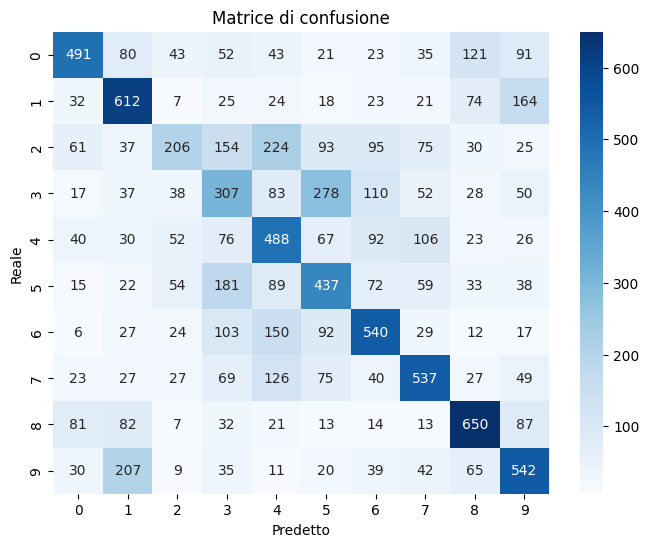

[CV] END alpha=0.0001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=  30.9s
[CV] END alpha=0.0001, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=  40.2s
[CV] END alpha=0.0001, hidden_layer_sizes=(128,), learning_rate_init=0.005; total time=  37.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(64, 32), learning_rate_init=0.005; total time=  25.8s
[CV] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.001; total time=  30.0s
[CV] END alpha=0.001, hidden_layer_sizes=(64,), learning_rate_init=0.005; total time=  18.2s
[CV] END alpha=0.001, hidden_layer_sizes=(128,), learning_rate_init=0.001; total time=  41.2s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  27.3s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.001; total time=  22.3s
[CV] END alpha=0.001, hidden_layer_sizes=(64, 32), learning_rate_init=0.005; total time=  32.1s
[CV] END alpha=0.01, hidden_layer_sizes=(64,), lear

In [18]:
def main():
    # Carico i dati
    x_train, y_train, x_val, y_val, x_test, y_test = load_data()
    
    show_images(x_train, title="Immagini originali")
    
    # Rimuovo i blocchi colorati per evitare overfitting
    x_train_clean = remove_colored_block(x_train)
    x_val_clean = remove_colored_block(x_val)
    x_test_clean = remove_colored_block(x_test)

    show_images(x_train_clean, title="Immagini dopo la rimozione del blocco")

    # Preprocessing
    x_train_proc, x_val_proc, x_test_proc = preprocess(x_train_clean, x_val_clean, x_test_clean)

    # Model selection con GridSearch
    best_model = grid_search(x_train_proc, y_train)

    # Valutazione finale
    evaluate_model(best_model, x_train_proc, y_train, "Train")
    evaluate_model(best_model, x_val_proc, y_val, "Validation")
    evaluate_model(best_model, x_test_proc, y_test, "Test")

main()